# Table of Contents
01 Importing Libraries, Path, Files

02 Creating Bar Charts

03 Creating Histograms and Scatterplots

04 Creating Line Charts

05 Sampling Data

# 01 Importing Libraries, Path, Files

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# define path
path = r'C:\Users\heidi\Desktop\Instacart Basket Analysis 01-09-2022'

In [4]:
# import orders_products_combined
df_ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged.4.8.pkl'))

# 02 Creating Bar Charts

<AxesSubplot:>

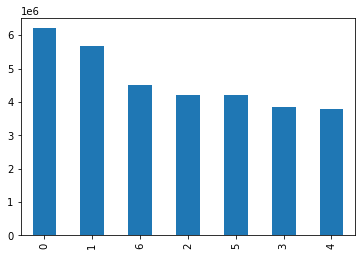

In [5]:
# bar chart based on freq of orders day of week column
df_ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

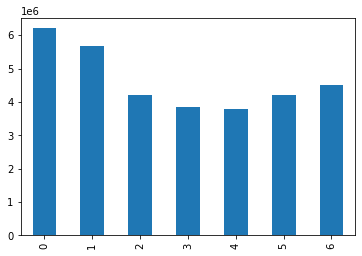

In [6]:
# sort by x axis instead of y axis
df_ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

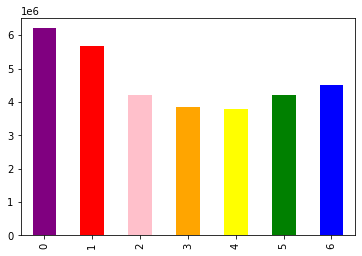

In [7]:
# adding color
df_ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

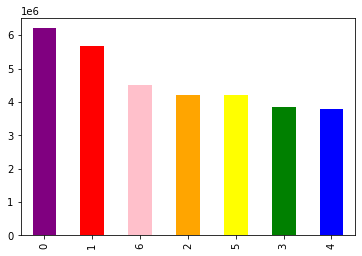

In [8]:
# saving bar chart as object
bar = df_ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [9]:
# export fig
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# 03 Creating Histograms and Scatterplots

<AxesSubplot:ylabel='Frequency'>

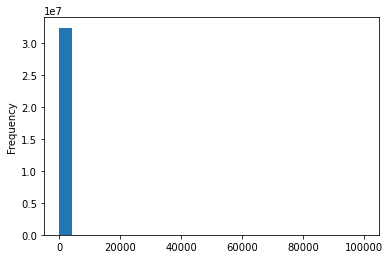

In [10]:
# create histogram of prices with bins of 25
df_ords_prods_merge['prices'].plot.hist(bins = 25)

In [11]:
# troubleshooting weird results
df_ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [12]:
df_ords_prods_merge['prices'].mean()

11.980225638467232

In [13]:
df_ords_prods_merge['prices'].median()

7.4

In [14]:
df_ords_prods_merge['prices'].max()

99999.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

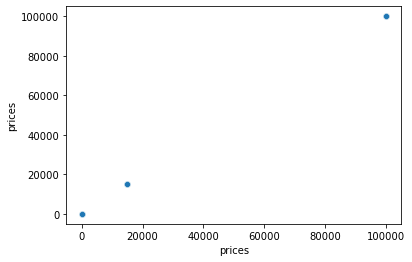

In [15]:
# troubleshoot via scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_merge)

In [16]:
# View the outliers by checking for prices over $100
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] > 100]

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order,spend_flag,order_freq,freq_flag
10030345,912404,17,prior,12,2,14,5.0,21553,5,0,...,High-range product,Regularly busy,Regularly busy days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,prior,22,6,16,4.0,21553,3,1,...,High-range product,Regularly busy,Regularly busy days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,prior,2,2,21,13.0,21553,6,0,...,High-range product,Regularly busy,Regularly busy days,Average orders,4,New customer,1154.792308,High spender,11.5,Regular customer
10030348,892534,135,prior,3,0,8,12.0,21553,3,1,...,High-range product,Busiest day,Busiest days,Most orders,4,New customer,1154.792308,High spender,11.5,Regular customer
10030349,229704,342,prior,8,1,19,30.0,21553,9,0,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,20.0,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,prior,29,0,8,4.0,33664,1,0,...,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,prior,31,0,9,2.0,33664,1,1,...,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,prior,13,3,15,8.0,33664,25,0,...,High-range product,Regularly busy,Least busy days,Most orders,15,Regular customer,451.153540,High spender,4.0,Frequent customer
29166212,2486215,205227,prior,7,3,20,4.0,33664,8,0,...,High-range product,Regularly busy,Least busy days,Average orders,12,Regular customer,1178.381871,High spender,7.0,Frequent customer


In [17]:
# mark the highest prices as NaNs
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [18]:
#check the output
df_ords_prods_merge['prices'].max()

25.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

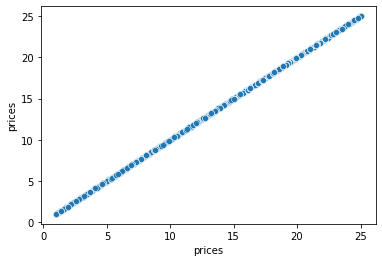

In [19]:
# rerun scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_merge)

<AxesSubplot:ylabel='Frequency'>

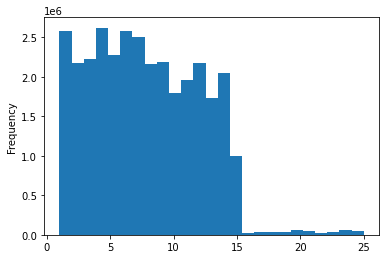

In [20]:
# create histogram of prices with bins of 25
df_ords_prods_merge['prices'].plot.hist(bins = 25)

<AxesSubplot:ylabel='Frequency'>

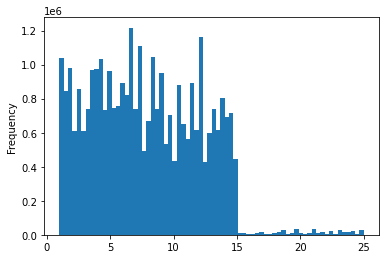

In [21]:
# create histogram of prices with bins of 70
df_ords_prods_merge['prices'].plot.hist(bins = 70)

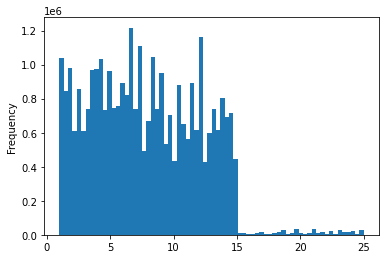

In [22]:
# create hist object
hist = df_ords_prods_merge['prices'].plot.hist(bins = 70)

In [23]:
# export hist object
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

# 04 Creating Line Charts

In [24]:
# create smaller table from whole
df = df_ords_prods_merge[:2000000]

# 05 Sampling Data

In [25]:
# get a sample of data
np.random.seed(4)

In [26]:
dev = np.random.rand(len(df_ords_prods_merge)) <= 0.7

In [27]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [28]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [29]:
# split df into 2 samples
big = df_ords_prods_merge[dev]

In [30]:
small = df_ords_prods_merge[~dev]

In [31]:
# check the output
len(df_ords_prods_merge)

32404859

In [32]:
len(big) + len(small)

32404859

In [33]:
# create df with only needed columns
df_2 = small[['orders_day_of_week','prices']]

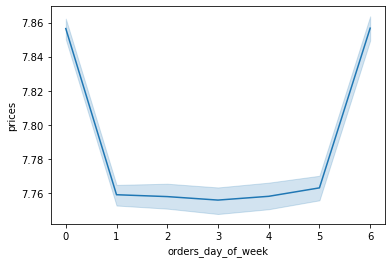

In [34]:
# create line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [36]:
# export file to pickle
df_ords_prods_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged.4.9.pkl'))